# SNCF - La fréquentation des gares a-t-elle une influence sur le nombre d'objet perdu?

In [1]:
import pandas as pd
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')

## I : Variation de la fréquentation du réseau sur le temps

In [2]:
dataFreq = pd.read_csv('./data/frequentation-gares.csv', delimiter=';')

In [3]:
dataFreq.head()

,Nom de la gare,Code UIC complet,Code postal,Segmentation DRG 2021,Total Voyageurs 2020,Total Voyageurs + Non voyageurs 2020,Total Voyageurs 2019,Total Voyageurs + Non voyageurs 2019,Total Voyageurs 2018,Total Voyageurs + Non voyageurs 2018,Total Voyageurs 2017,Total Voyageurs + Non voyageurs 2017,Total Voyageurs 2016,Total Voyageurs + Non voyageurs 2016,Total Voyageurs 2015,Total Voyageurs + Non voyageurs 2015
0,Abbeville,87317362,80100,B,505759,632199,757362,946702,710325,887907,750298,937872,727081,908851,758410,948013
1,Achères Ville,87381657,78260,B,1896770,1896770,3468208,3468208,3478859,3478859,3497615,3497615,3454567,3454567,3389509,3389509
2,Aéroport Charles de Gaulle 1,87271460,93290,B,4359621,4359621,7971396,7971396,7590098,7590098,7199779,7199779,6690263,6690263,6226179,6226179
3,Aigrefeuille-d'Aunis,87485193,17290,C,24987,24987,31170,31170,18670,18670,14513,14513,266,266,0,0
4,Aigues-Mortes,87775858,30220,C,5683,5683,6146,6146,5311,5311,4822,4822,3546,3546,3917,3917


In [4]:
usersOverYears = dict()
usersOverYears['2015'] = dataFreq['Total Voyageurs 2015'].sum()
usersOverYears['2016'] = dataFreq['Total Voyageurs 2016'].sum()
usersOverYears['2017'] = dataFreq['Total Voyageurs 2017'].sum()
usersOverYears['2018'] = dataFreq['Total Voyageurs 2018'].sum()
usersOverYears['2019'] = dataFreq['Total Voyageurs 2019'].sum()
usersOverYears['2020'] = dataFreq['Total Voyageurs 2020'].sum()
usersOverYearsDf = pd.DataFrame.from_dict(usersOverYears, orient='index')
# rename columns
usersOverYearsDf.index.names = ['Année']
usersOverYearsDf = usersOverYearsDf.rename(columns = {0:'Nombre'})
usersOverYearsDf['Type'] = "Utilisateurs"

In [5]:
allUsersOverYears = dict()
allUsersOverYears['2015'] = dataFreq['Total Voyageurs + Non voyageurs 2015'].sum()
allUsersOverYears['2016'] = dataFreq['Total Voyageurs + Non voyageurs 2016'].sum()
allUsersOverYears['2017'] = dataFreq['Total Voyageurs + Non voyageurs 2017'].sum()
allUsersOverYears['2018'] = dataFreq['Total Voyageurs + Non voyageurs 2018'].sum()
allUsersOverYears['2019'] = dataFreq['Total Voyageurs + Non voyageurs 2019'].sum()
allUsersOverYears['2020'] = dataFreq['Total Voyageurs + Non voyageurs 2020'].sum()
allUsersOverYearsDf = pd.DataFrame.from_dict(allUsersOverYears, orient='index')
# rename columns
allUsersOverYearsDf.index.names = ['Année']
allUsersOverYearsDf = allUsersOverYearsDf.rename(columns = {0:'Nombre'})
allUsersOverYearsDf['Type'] = "Tout utilisateurs"

In [6]:
visitorsOverYears = dict()
visitorsOverYears['2015'] = allUsersOverYears['2015'] - usersOverYears['2015']
visitorsOverYears['2016'] = allUsersOverYears['2016'] - usersOverYears['2016']
visitorsOverYears['2017'] = allUsersOverYears['2017'] - usersOverYears['2017']
visitorsOverYears['2018'] = allUsersOverYears['2018'] - usersOverYears['2018']
visitorsOverYears['2019'] = allUsersOverYears['2019'] - usersOverYears['2019']
visitorsOverYears['2020'] = allUsersOverYears['2020'] - usersOverYears['2020']
visitorsOverYearsDf = pd.DataFrame.from_dict(visitorsOverYears, orient='index')
# rename columns
visitorsOverYearsDf.index.names = ['Année']
visitorsOverYearsDf = visitorsOverYearsDf.rename(columns = {0:'Nombre'})
visitorsOverYearsDf['Type'] = "Visiteurs"

<AxesSubplot: xlabel='Année', ylabel='Nombre'>

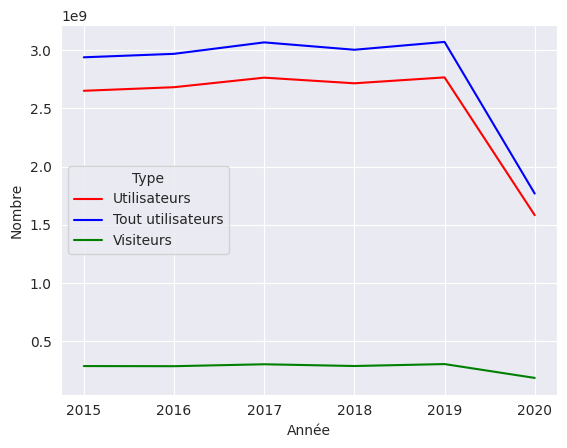

In [7]:
sb.lineplot(data=usersOverYearsDf, x='Année', y='Nombre', hue='Type', palette=['r'])
sb.lineplot(data=allUsersOverYearsDf, x='Année', y='Nombre', hue='Type', palette=['b'])
sb.lineplot(data=visitorsOverYearsDf, x='Année', y='Nombre', hue='Type', palette=['g'])

On peut voir que les trois courbes suivent la même tendance :
   - une augmentation régulière de la fréquentation de 2015 à 2019
   - une chute de la fréquentation en 2020

In [8]:
print("Perte d'utilisateur en 2020 : ", ((1-usersOverYears['2020']/usersOverYears['2019'])*100).round(2), '%')
print("Perte de visiteurs en 2020 : ", ((1-visitorsOverYears['2020']/visitorsOverYears['2019'])*100).round(2), '%')

Perte d'utilisateur en 2020 :  42.78 %
Perte de visiteurs en 2020 :  39.03 %


On peut conclure que en 2020 il y a un évènement qui a considérablement réduit la fréquentation du réseau. Cet évènement est sans aucun doute le confinement dû aux restrictions sanitaires liées à la pandémie du Covid-19

Donc pour la suite des analyses, nous allons exclure l'année 2020

## II : Fréquentation des gares

In [9]:
moyUsers = []
for index, row in dataFreq.iterrows():
    moyUsers.append((row['Total Voyageurs 2019']+row['Total Voyageurs 2018']+row['Total Voyageurs 2017']+row['Total Voyageurs 2016']+row['Total Voyageurs 2015'])/5)

# condition to avoid duplicate if the cell is reloaded
if not "Moyenne Voyageurs" in dataFreq:
    dataFreq.insert(loc=dataFreq.shape[1], column="Moyenne Voyageurs", value=moyUsers, allow_duplicates=True)

In [10]:
moyAllusers = []
for index, row in dataFreq.iterrows():
    moyAllusers.append((row['Total Voyageurs + Non voyageurs 2019']+row['Total Voyageurs + Non voyageurs 2018']+row['Total Voyageurs + Non voyageurs 2017']+row['Total Voyageurs + Non voyageurs 2016']+row['Total Voyageurs + Non voyageurs 2015'])/5)

# condition to avoid duplicate if the cell is reloaded
if not "Moyenne Tout Utilisateurs" in dataFreq:
    dataFreq.insert(loc=dataFreq.shape[1], column="Moyenne Tout Utilisateurs", value=moyAllusers, allow_duplicates=True)

In [11]:
moyVisitors = []
for index, row in dataFreq.iterrows():
    moyVisitors.append(row['Moyenne Tout Utilisateurs'] - row['Moyenne Voyageurs'])

# condition to avoid duplicate if the cell is reloaded
if not "Moyenne Visiteurs" in dataFreq:
    dataFreq.insert(loc=dataFreq.shape[1], column="Moyenne Visiteurs", value=moyVisitors, allow_duplicates=True)

Nous allons retirer les gares où il n'y a ni de visiteur ni de voyageur

In [12]:
dataFreq = dataFreq[dataFreq['Moyenne Tout Utilisateurs'] > 0]

AxesSubplot(0.125,0.11;0.775x0.77)
Nombre de gares :  2960


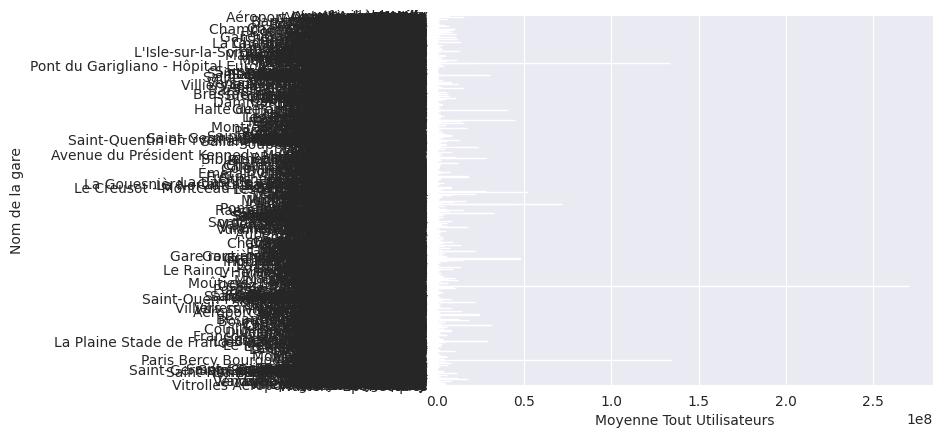

In [13]:
print(sb.barplot(dataFreq, x="Moyenne Tout Utilisateurs", y="Nom de la gare"))
print("Nombre de gares : ", len(dataFreq))

Les données de ce graphique sont illisibles, nous allons donc affiner et ne prendre que les valeurs et plus hautes d'un coté et les plus basses de l'autre ainsi que les gares de la médiane

<AxesSubplot: xlabel='Moyenne Tout Utilisateurs', ylabel='Nom de la gare'>

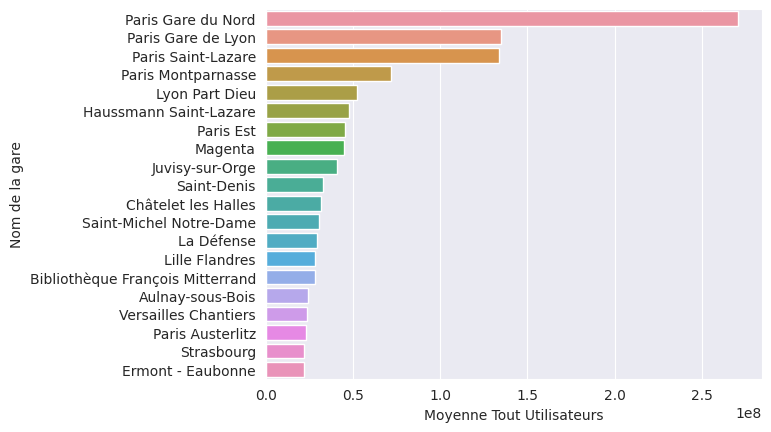

In [14]:
sb.barplot(data=dataFreq.nlargest(20, "Moyenne Tout Utilisateurs") , x="Moyenne Tout Utilisateurs", y="Nom de la gare")

<AxesSubplot: xlabel='Moyenne Tout Utilisateurs', ylabel='Nom de la gare'>

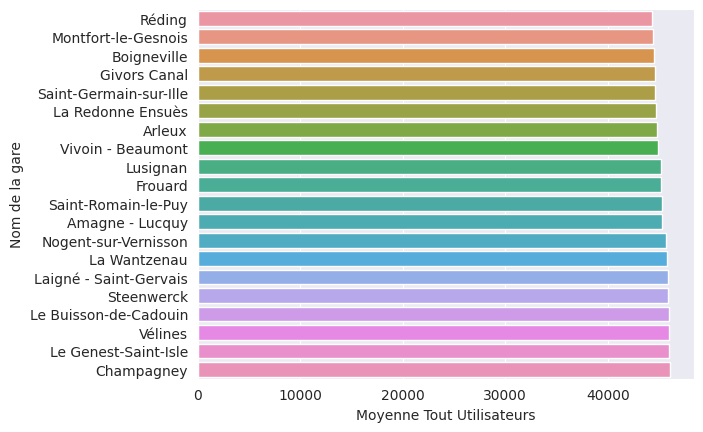

In [15]:
sb.barplot(data=dataFreq.sort_values('Moyenne Tout Utilisateurs')[int(len(dataFreq)/2-10):int(len(dataFreq)/2+10)] , x="Moyenne Tout Utilisateurs", y="Nom de la gare")

<AxesSubplot: xlabel='Moyenne Tout Utilisateurs', ylabel='Nom de la gare'>

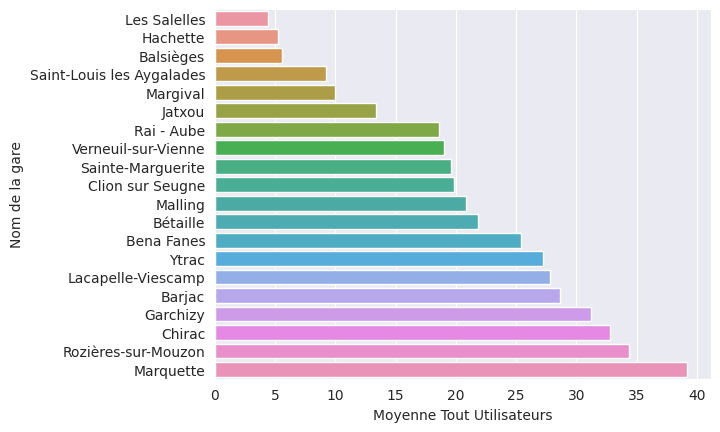

In [16]:
sb.barplot(data=dataFreq.nsmallest(20, "Moyenne Tout Utilisateurs"), x="Moyenne Tout Utilisateurs", y="Nom de la gare")
# remove closed station with 0 user

Nous avons ici les 20 gares les moins utilisées, les plus utilisées et la médiane

## III : Fréquentation par segment DRG

Définition du "segment DRG" :
- Catégorie A : gares de voyageurs d’intérêt national
- Catégorie B : gares de voyageurs d’intérêt régional
- Catégorie C : gares de voyageurs d’intérêt local

In [17]:
GSA = len(dataFreq[dataFreq['Segmentation DRG 2021'] == 'A'])
GSB = len(dataFreq[dataFreq['Segmentation DRG 2021'] == 'B'])
GSC = len(dataFreq[dataFreq['Segmentation DRG 2021'] == 'C'])
stationCount = len(dataFreq)
pourcentageSegmentData = [str(round(GSA/stationCount*100, 2))+" %", str(round(GSB/stationCount*100, 2))+" %", str(round(GSC/stationCount*100, 2))+" %"]
segmentDf = pd.DataFrame(data={"Segment": ["A", "B", "C"], "Nombre de gare": [GSA, GSB, GSC], "Pourcentage": pourcentageSegmentData})

<AxesSubplot: xlabel='Segment', ylabel='Nombre de gare'>

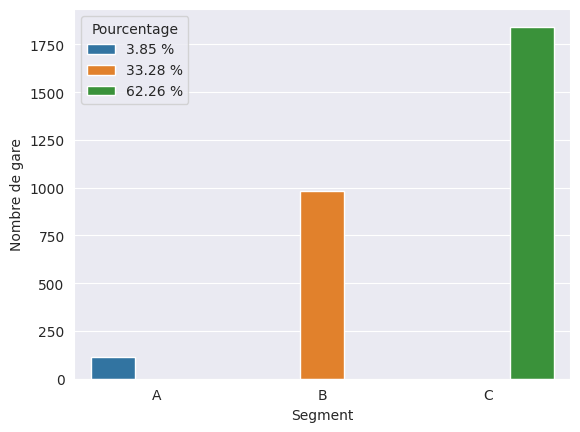

In [18]:
sb.barplot(data=segmentDf, x="Segment", y="Nombre de gare", hue="Pourcentage")

In [19]:
moyA = int(dataFreq[(dataFreq['Segmentation DRG 2021'] == 'A')].mean()['Moyenne Tout Utilisateurs'])
moyB = int(dataFreq[(dataFreq['Segmentation DRG 2021'] == 'B')].mean()['Moyenne Tout Utilisateurs'])
moyC = int(dataFreq[(dataFreq['Segmentation DRG 2021'] == 'C')].mean()['Moyenne Tout Utilisateurs'])
sumFreq = sum(dataFreq['Moyenne Tout Utilisateurs'])

print("Moyenne fréquentation segment A :", moyA, "soit environ", round((moyA*len(dataFreq[(dataFreq['Segmentation DRG 2021'] == 'A')])/sumFreq)*100, 2), '%')
print("Moyenne fréquentation segment B :", moyB, "soit environ", round((moyB*len(dataFreq[(dataFreq['Segmentation DRG 2021'] == 'B')])/sumFreq)*100, 2), '%')
print("Moyenne fréquentation segment C :", moyC, "soit environ", round((moyC*len(dataFreq[(dataFreq['Segmentation DRG 2021'] == 'C')])/sumFreq)*100, 2), '%')

Moyenne fréquentation segment A : 10518734 soit environ 39.84 %
Moyenne fréquentation segment B : 1751712 soit environ 57.32 %
Moyenne fréquentation segment C : 25670 soit environ 1.57 %


On a la confirmation que nos données sont conformes

### IV : Les objets trouvés

In [20]:
dataLostAndFound = pd.read_csv('./data/objets-trouves.csv', delimiter=';')
dataLostAndFound.head()

,Date,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
0,2018-01-05T07:54:17+01:00,2018-01-08T15:52:30+01:00,Dijon,87713040.0,"Valise, sac sur roulettes","Bagagerie: sacs, valises, cartables",Objet trouvé
1,2018-01-05T08:19:10+01:00,NaN,Châtellerault,87575142.0,"Parapluie télescopique, parapluie de poche",Parapluies,Objet trouvé
2,2018-01-05T08:21:06+01:00,NaN,Creil,87276006.0,"Attaché-case, serviette","Bagagerie: sacs, valises, cartables",Objet trouvé
3,2018-01-05T08:24:25+01:00,2018-01-09T09:41:26+01:00,Nantes,87481002.0,Lunettes en étui,Optique,Objet trouvé
4,2018-01-05T08:43:24+01:00,NaN,Châtellerault,87575142.0,"Parapluie-canne, parapluie à bandoulière",Parapluies,Objet trouvé


In [21]:
dataLoss = pd.read_csv('./data/declarations-pertes.csv', delimiter=';')
dataLoss.head()

,Date,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
0,2020-09-03T08:10:52+02:00,NaN,NaN,"Valise, sac sur roulettes","Bagagerie: sacs, valises, cartables",Déclaration de Perte
1,2020-09-03T11:29:34+02:00,Bordeaux Saint-Jean,87581009.0,"Téléphone portable protégé (étui, coque,…)","Appareils électroniques, informatiques, appare...",Déclaration de Perte
2,2019-12-02T08:28:48+01:00,NaN,NaN,"Téléphone portable protégé (étui, coque,…)","Appareils électroniques, informatiques, appare...",Déclaration de Perte
3,2020-03-09T09:46:26+01:00,NaN,NaN,"Clés, porte-clés","Clés, porte-clés, badge magnétique",Déclaration de Perte
4,2020-08-21T16:50:35+02:00,NaN,NaN,Sac à dos,"Bagagerie: sacs, valises, cartables",Déclaration de Perte


De ces deux fichiers csv, nous allons garder les enregistrements que de 2015 à 1019

In [22]:
datesTab = []
for index, row in dataLostAndFound.iterrows():
    datesTab.append(int(row['Date'][:4]))
dataLostAndFound['Date'] = datesTab

datesTab = []
for index, row in dataLoss.iterrows():
    datesTab.append(int(row['Date'][:4]))
dataLoss['Date'] = datesTab

In [23]:
dataLostAndFound = dataLostAndFound[(dataLostAndFound['Date'] >= 2015) & (dataLostAndFound['Date'] <= 2019)]
dataLoss = dataLoss[(dataLoss['Date'] >= 2015) & (dataLoss['Date'] <= 2019)]

In [24]:
dictLostAndFoundByStation = {}
for index, row in dataLostAndFound.iterrows():
    if row['Gare'] in dictLostAndFoundByStation:
        dictLostAndFoundByStation[row['Gare']] += 1
    else:
         dictLostAndFoundByStation[row['Gare']] = 1

dataLostAndFoundByStation = pd.DataFrame.from_dict(dictLostAndFoundByStation, orient='index')
# rename columns
dataLostAndFoundByStation.index.names = ['Nom de la gare']
dataLostAndFoundByStation = dataLostAndFoundByStation.rename(columns = {0:'Objets Trouvés'})

In [25]:
dictLossByStation = {}
for index, row in dataLoss.iterrows():
    if row['Gare'] in dictLossByStation:
        dictLossByStation[row['Gare']] += 1
    else:
         dictLossByStation[row['Gare']] = 1

dataLossByStation = pd.DataFrame.from_dict(dictLossByStation, orient='index')
# rename columns
dataLossByStation.index.names = ['Nom de la gare']
dataLossByStation = dataLossByStation.rename(columns = {0:'Pertes Déclarées'})

In [26]:
data = pd.merge(dataFreq, dataLostAndFoundByStation, how='left', on='Nom de la gare')
data = pd.merge(data, dataLossByStation, how='left', on='Nom de la gare')
data = data.fillna(0)

In [27]:
sumObjects = []
for index, row in data.iterrows():
    sumObjects.append(row['Objets Trouvés']+row['Pertes Déclarées'])

# condition to avoid duplicate if the cell is reloaded
if not "Objets trouvés et déclarés perdus" in data:
    data.insert(loc=data.shape[1], column="Objets trouvés et déclarés perdus", value=sumObjects, allow_duplicates=True)

# data = data[data['Objets trouvés et déclarés perdus'] > 0]
print("Nombre de gare exploitable :", len(data))

Nombre de gare exploitable : 2960


## V : Analyse du ratio "objets trouvés / utilisateur" et de sa tendance

In [28]:
ratioTab = []
for index, row in data.iterrows():
    ratioTab.append((row['Objets trouvés et déclarés perdus']/4)/row['Moyenne Tout Utilisateurs'])

# condition to avoid duplicate if the cell is reloaded
if not "Objets perdues / utilisateur" in data:
    data.insert(loc=data.shape[1], column="Objets perdues / utilisateur", value=ratioTab, allow_duplicates=True)

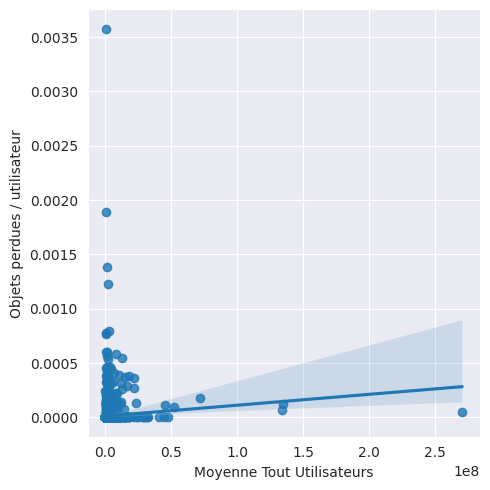

In [29]:
sb.lmplot(data=data, x="Moyenne Tout Utilisateurs", y="Objets perdues / utilisateur")

On peut voir sur ce graphique que la tendance est croissante, pourtant on peut remarquer que le ratio objets perdus / utilisateur est beaucoup plus grand dans les gares avec peu de fréquentation.
Pour éclaircir ce graphique, nous allons le découper par segment et en tirer une tendance plus précise.

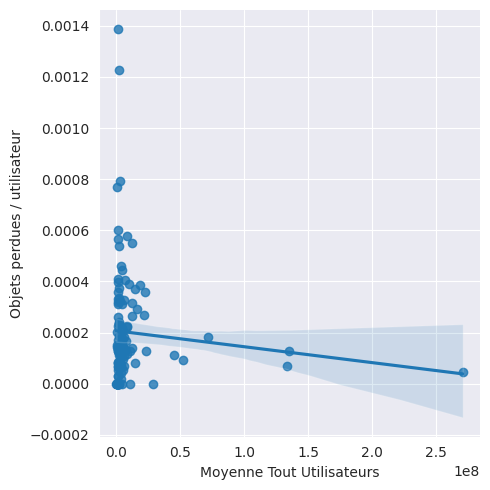

In [30]:
sb.lmplot(data=data[data['Segmentation DRG 2021'] == 'A'], x="Moyenne Tout Utilisateurs", y="Objets perdues / utilisateur")

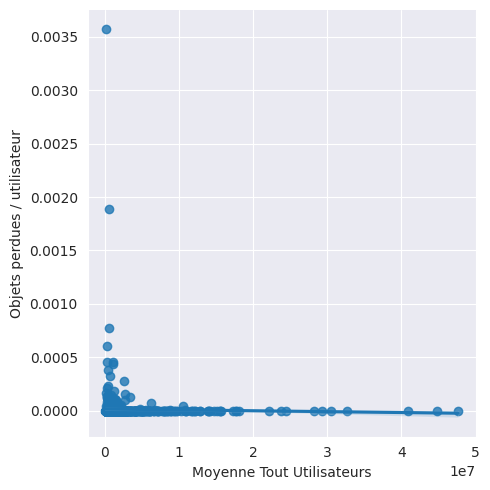

In [31]:
sb.lmplot(data=data[data['Segmentation DRG 2021'] == 'B'], x="Moyenne Tout Utilisateurs", y="Objets perdues / utilisateur")

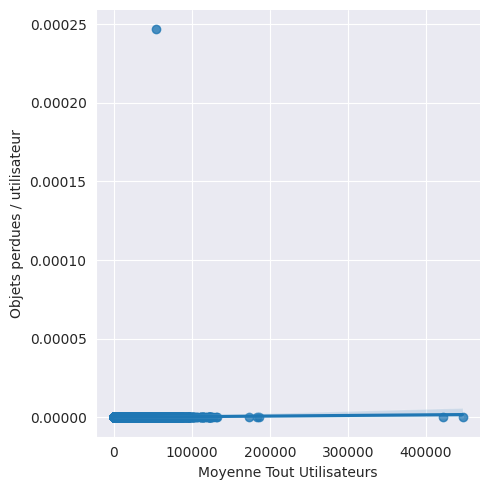

In [32]:
sb.lmplot(data=data[data['Segmentation DRG 2021'] == 'C'], x="Moyenne Tout Utilisateurs", y="Objets perdues / utilisateur")

On peut voir avec les trois derniers graphiques que tendance est décroissante : le poids des gares avec aucun recensement d'objets perdus / trouvés inverse la tendance

Regardons quel est le pourcentage de gare où il n'y a eu aucun recensement

In [33]:
print(round((len(data[(data['Objets Trouvés'] == 0) & (data['Pertes Déclarées'] == 0)])/len(data))*100, 2), '%')

94.16 %


Le nombre de gare avec aucun recensement est beaucoup trop grand comparé au reste, nous allons donc les exclure

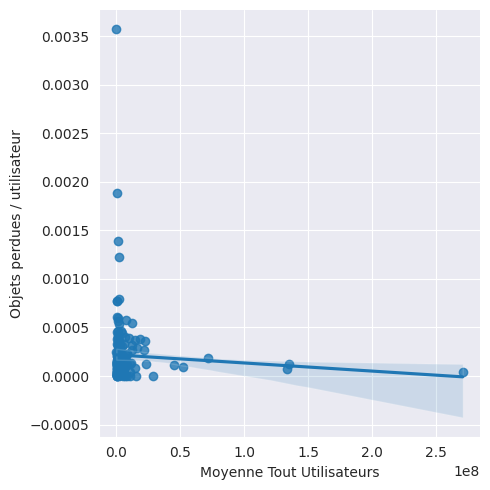

In [34]:
sb.lmplot(data=data[data['Objets perdues / utilisateur'] > 0], x="Moyenne Tout Utilisateurs", y="Objets perdues / utilisateur")

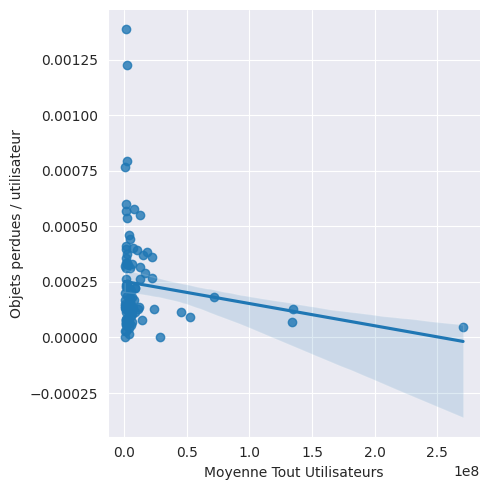

In [35]:
sb.lmplot(data=data[(data['Segmentation DRG 2021'] == 'A') & (data['Objets perdues / utilisateur'] > 0)], x="Moyenne Tout Utilisateurs", y="Objets perdues / utilisateur")

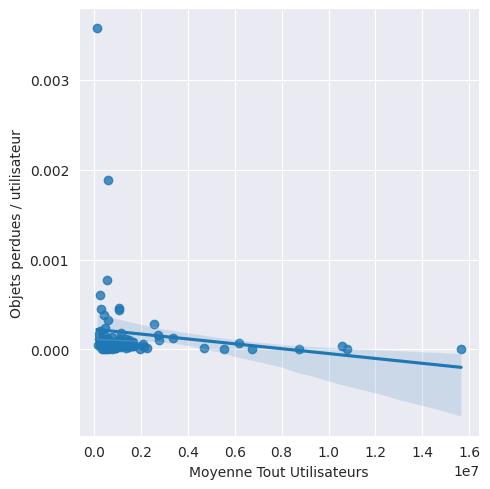

In [36]:
sb.lmplot(data=data[(data['Segmentation DRG 2021'] == 'B') & (data['Objets perdues / utilisateur'] > 0)], x="Moyenne Tout Utilisateurs", y="Objets perdues / utilisateur")

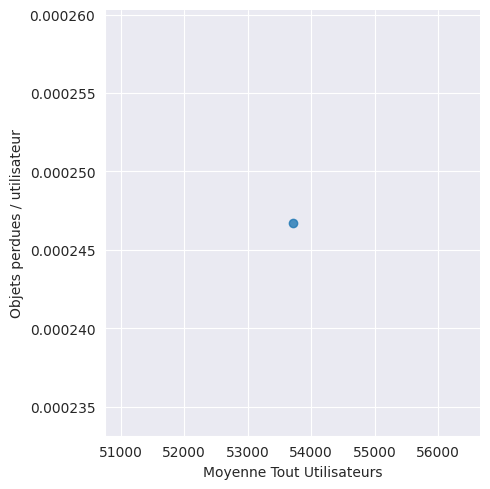

In [37]:
sb.lmplot(data=data[(data['Segmentation DRG 2021'] == 'C') & (data['Objets perdues / utilisateur'] > 0)], x="Moyenne Tout Utilisateurs", y="Objets perdues / utilisateur")

On peut voir finalement que la tendance est décroissante avec la fréquentation des gares

## Conclusion

Oui la fréquentation des gares à une influence sur le nombre d'objet perdu / trouvé et elle à l'air plutôt positive : <b>plus une gare est fréquentée moins ses utilisateurs sont enclins de perdre un objet</b>.

Cependant, les données utilisés comportent un très quand nombre de gare où il n'y a eu aucun recensement d'objet trouvé / perdu. Ce sont pour la plupart des gares du segment C et pose la question suivante : comment sont recensés les objets ? Sont-ils recensés à la fin de chaque trajet (c'est à dire au terminus qui sont souvent les gares de segment A) ? Sont-ils pour les petites gares gérés sont être recensés? Est ce les vols sont-ils compris dans ces données là?